In [19]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Phase Change

The task is related to Fourier Transforms. It will study the magnitude and phase.

## Step 1. 

Load two grayscale images. 

#### Detailed explanation

The images are read in grayscale, displayed and their shape is printed.

(512, 512)

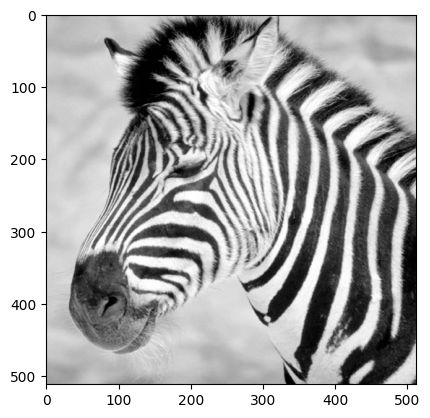

In [20]:
zebra = cv2.imread('zebra.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(zebra, cmap = "gray")
zebra.shape

(512, 512)

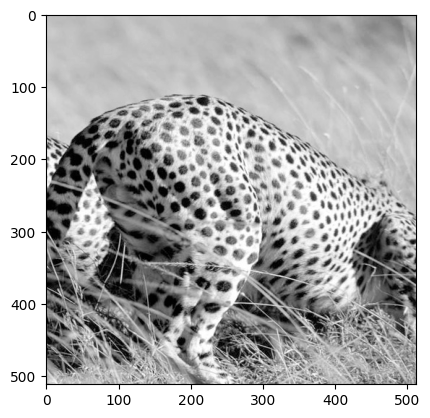

In [21]:
cheetah = cv2.imread('cheetah.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(cheetah, cmap = "gray")
cheetah.shape

## Step 2. 
Convert them to the Fourier domain. 

###### Use `fft2()`

#### Detailed explanation

- The images are converted to the Fourier domain by applying the cv2's *discrete Fourier transform*.

- The spectrum is shifted afterwards using numpy's *fast Fourier transform shift*, and by doing that, it becomes easier to understand and manipulate the information.

- Finally, with `cv2.cartToPolar` the previously resultant matrices are converted from cartesian to polar coordinates.    

In [22]:
dftZebra = np.fft.fftshift(cv2.dft(np.float32(zebra), flags = cv2.DFT_COMPLEX_OUTPUT))
mZebra, aZebra = cv2.cartToPolar(dftZebra[:,:,0], dftZebra[:,:,1])

In [23]:
dftCheetah = np.fft.fftshift(cv2.dft(np.float32(cheetah), flags = cv2.DFT_COMPLEX_OUTPUT))
mCheetah, aCheetah = cv2.cartToPolar(dftCheetah[:, :, 0], dftCheetah[:, :, 1])

## Step 3.
Plot the magnitude and phase of the two Fourier Transforms.

#### Detailed explanation

The one thing to bring out from these cells is the fact that the magnitude of the images has to be scaled for displaying porpuses. This task is achieved by applying the `log` math operation to the values.

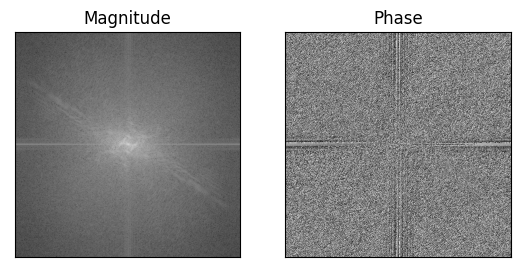

In [24]:
plt.subplot(121), plt.imshow(20*np.log(mZebra), cmap = 'gray')
plt.title('Magnitude'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(aZebra, cmap = 'gray')
plt.title('Phase'), plt.xticks([]), plt.yticks([])
plt.show()

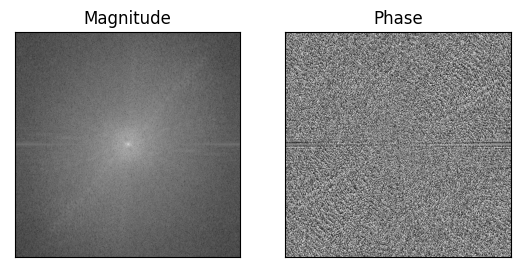

In [25]:
plt.subplot(121), plt.imshow(20*np.log(mCheetah), cmap = 'gray')
plt.title('Magnitude'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(aCheetah, cmap = 'gray')
plt.title('Phase'), plt.xticks([]), plt.yticks([])
plt.show()

## Step 4.
Now try switching the phase between the two Fourier Transforms and reconstruct the original images.

If you have the magnitude, say |C| and the phase, say θ, of the Fourier complex numbers, you can use this formula to convert back to the original complex numbers.

```
C = |C|(cosθ + jsinθ)
```

#### Detailed explanation

The steps for a successful merge of the *phase + magnitude* are:

- Apply the given formula.

- Stack the resultant matrices.

- Then unshifting the spectrum is needed.

- And the final step is applying the *inverse discrete Fourier transform*.

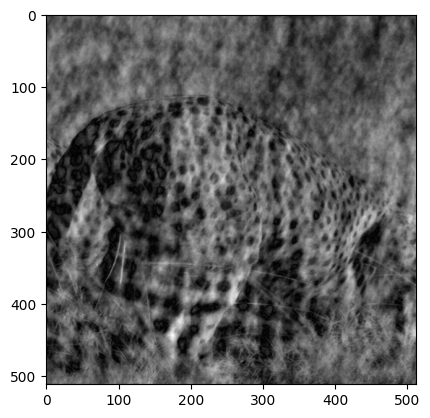

In [26]:
bZebra = np.stack((mZebra * np.cos(aCheetah), mZebra * np.sin(aCheetah)), axis = 2)
zC = cv2.idft(np.float32(np.fft.ifftshift(bZebra)), flags = cv2.DFT_SCALE)
plt.imshow(cv2.magnitude(zC[:, :, 0], zC[:, :, 1]), cmap = "gray")

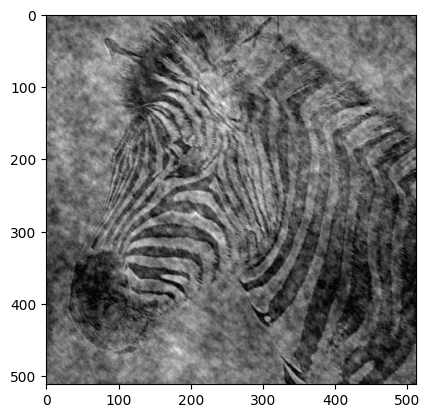

In [28]:
bCheetah = np.stack((mCheetah * np.cos(aZebra), mCheetah * np.sin(aZebra)), axis = 2)
cZ = cv2.idft(np.float32(np.fft.ifftshift(bCheetah)), flags = cv2.DFT_SCALE)
plt.imshow(cv2.magnitude(cZ[:, :, 0], cZ[:, :, 1]), cmap = "gray")

### Conclusion

#### Sarita's 

Write your thoughts like this.

#### Lalito's

After seeing the results, it's pretty clear for me that it is the phase the one that rules in the construction of an image. Since, even with mixed information, it's still possible to see the image that the phase represents.

-----

###### 0226594 Sara Carolina Gomez Delgado
###### 0224969 Luis Eduardo Robles Jimenez
